In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
plt.style.use('./paper.mplstyle')

In [2]:
cases = ("colesoncove_ds.out.json", "navajo_ds.out.json", "belchatow_ds.out.json")
labels = (
    "Coleson Cove\nGeneration Station",
    "Navajo\nGeneration Station",
    "Condenser at\nBechatow, Poland",
)

Pvap = []
Tvap = []
kvap = []
Tout = []
m = []

for case in cases:
    with open(case) as f:
        json_data=f.read()
    output = json.loads(json_data)
    Pvap.append(output["condenser.Pext"]["Values"][-1])
    Tvap.append(output["condenser.Text"]["Values"][-1])
    kvap.append(output["condenser.kvap"]["Values"][-1])
    Tout.append(output["node_C.T"]["Values"][-1])
    m.append(output["node_C.w"]["Values"][-1])
Pvap = np.array(Pvap)
Tvap = np.array(Tvap)
kvap = np.array(kvap)
Tout = np.array(Tout)
m = np.array(m)
Tvap_Celsius = Tvap - 273.15

print("Pvap", Pvap)
print("Tvap", Tvap)
print("kvap", kvap)
print("Tout", Tout)
print("m", m)

Pvap [ 5179.87648095 12617.32635178  6574.8366613 ]
Tvap [306.74776393 323.40824205 311.00330113]
kvap [101.13063826 459.33925016  33.12961161]
Tout [300.64595165 318.35747302 303.63981152]
m [ 3859. 16360.  2448.]


In [3]:
Tvap_exp = np.array([34.3, 51.07, 37.96])
Tvap_tga = Tvap_exp * (1 + np.array([-9.43, -3.79, -1.15])/100)

In [4]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate("{number:.{digits}f}".format(number=height, digits=2),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=13,
                    ha='center', va='bottom')

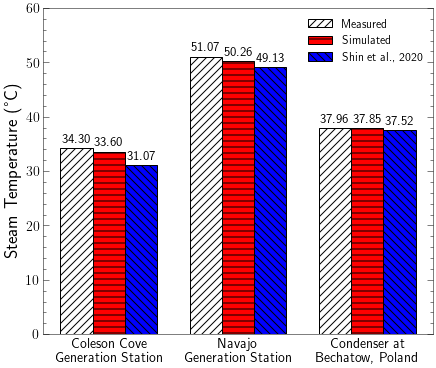

In [5]:
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 6))
rects1 = ax.bar(x - width, Tvap_exp, width, edgecolor='black', color="white", label='Measured', hatch="///")
rects2 = ax.bar(x + 0, Tvap_Celsius, width, edgecolor='black', color="red", label='Simulated', hatch="--")
rects3 = ax.bar(x + width, Tvap_tga, width, edgecolor='black', color="blue", label='Shin et al., 2020', hatch="\\\\\\")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Steam Temperature (°C)')
#ax.set_title('Validation')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.tick_params(
    axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.legend()
plt.ylim(0, 60)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

#fig.tight_layout()

plt.savefig('./figures/validation.pdf')
plt.show()
